### Orr-Sommerfeld eqs - cylinder flow 

    data = https://www.ece.umn.edu/users/mihailo/software/dmdsp/download.html

In [51]:
%run DMD_functions.ipynb
%run Hemati_DMD_functions.ipynb

In [88]:
from scipy.io import loadmat

podaci = loadmat('channel.mat')

# Display the variable names in the .mat file
print(podaci.keys())

dt = np.array(podaci['dT'][0,0])
os = podaci['Eos']
s=podaci['S']
v=podaci['V']
ux = podaci['UstarX1']

podaci2 = loadmat('x0.mat')
x0=podaci2['x0']

del (podaci, podaci2)

dict_keys(['__header__', '__version__', '__globals__', 'UstarX1', 'S', 'V', 'dT', 'Eos'])


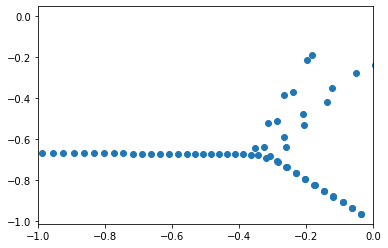

In [53]:
import matplotlib.pyplot as plt


plt.scatter(np.real(os), np.imag(os))
plt.xlim((-1,0))
plt.show()

In [54]:
xfull = loadmat('channel_xfull.mat')
xfull = xfull['X']
xfull.shape

(150, 101)

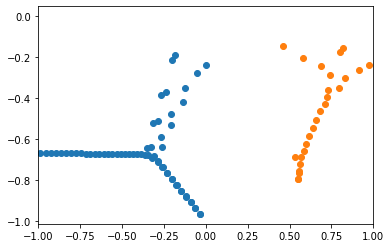

In [55]:
Z, L, r, _, _ = GEDMDQ(xfull[:,:100], xfull[:,1:101], k=26)
plt.scatter(np.real(os), np.imag(os)) #real orr-sommerfeld eigs
plt.scatter(np.real(L), np.imag(L))
plt.xlim(-1,1)
plt.show()

In [63]:
import pydmd
dmd1 = pydmd.DMD(svd_rank=26)
dmd1.fit(xfull[:,:100], xfull[:,1:101])
dmd1.dmd_time['tend']=100
dmd1.reconstructed_data.shape

dmd1.eigs

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\pydmd\snapshots.py:74: UserWarning: Input data condition number 5.758914725941411e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  f"Input data condition number {cond_number}. "
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\pydmd\snapshots.py:74: UserWarning: Input data condition number 5.043223748163143e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  f"Input data condition number {cond_number}. "


array([0.97556444-0.23618088j, 0.46008319-0.14499355j,
       0.91409366-0.26008701j, 0.81793777-0.15733283j,
       0.80081729-0.17297942j, 0.58273582-0.20306629j,
       0.82967272-0.30201992j, 0.69043514-0.24433573j,
       0.74178687-0.28712565j, 0.79651977-0.35224974j,
       0.73295208-0.35781495j, 0.72421489-0.39477648j,
       0.70951848-0.42952044j, 0.68421283-0.46509482j,
       0.6601709 -0.50588428j, 0.63824454-0.54662771j,
       0.61831591-0.5857505j , 0.60042754-0.62242804j,
       0.58467753-0.65570361j, 0.53232934-0.68842801j,
       0.57125325-0.68579064j, 0.56220953-0.71957316j,
       0.55003557-0.79343961j, 0.5498133 -0.79278348j,
       0.55650178-0.75606254j, 0.557709  -0.76598722j])

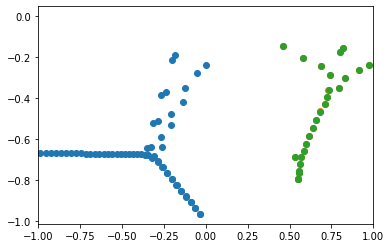

In [64]:
Z, L, r, _, _ = GEDMDQ(xfull[:,:100], xfull[:,1:101], k=26)
plt.scatter(np.real(os), np.imag(os)) #real orr-sommerfeld eigs
plt.scatter(np.real(L), np.imag(L))
plt.scatter(np.real(dmd1.eigs), np.imag(dmd1.eigs))
plt.xlim(-1,1)
plt.show()

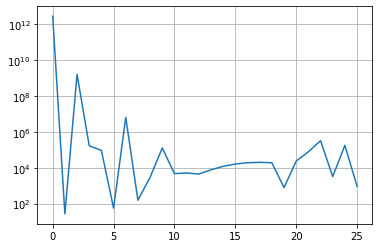

In [70]:
plt.plot(1/r)
plt.yscale('log')
plt.grid()
plt.show()

In [ ]:
threshold = 1e-1
indices = np.where(r<threshold)[0]
times=[i for i in range(101)]

reconstructed = DMD_reconstruction(xfull, Z, indices, L, times)
reconstructed-xfull

##bolje za veliki threshold (npr. 1e-1 umjesto 1e-6, 1e-8)
## bolje realni dio aprox nego imaginarni.., npr za threshold = 1e-1:
#  8.47333220e-16-2.95758635e-06j,  2.49252870e-15-3.40053401e-06j, -2.72402492e-15-2.25934521e-06j,...

#dmd1.reconstructed_data - xfull
#pydmd bolje aproksimira.. zasto..

array([[ 8.47333220e-16-2.95758635e-06j,  2.49252870e-15-3.40053401e-06j,
        -2.72402492e-15-2.25934521e-06j, ...,
        -1.01522786e-15-3.62451149e-06j, -2.00490475e-15-4.00302286e-06j,
        -6.15201504e-15-4.15521005e-06j],
       [ 2.21753226e-17-4.63961839e-05j,  3.52250510e-16-5.38544895e-05j,
        -2.06663842e-15-3.62264443e-05j, ...,
        -4.99098918e-16-5.73386267e-05j, -7.54594548e-16-6.34591404e-05j,
        -1.26764071e-15-6.59929776e-05j],
       [ 4.10777098e-16-2.27242581e-04j,  5.57374784e-16-2.67927798e-04j,
        -5.92326752e-16-1.83835228e-04j, ...,
         1.08433770e-15-2.84829025e-04j,  3.36900917e-15-3.16329931e-04j,
         6.17558678e-15-3.29962019e-04j],
       ...,
       [ 6.19079440e-17-2.20238939e-04j, -3.56377254e-16+3.21871409e-05j,
         4.38830829e-16+1.86545453e-04j, ...,
        -6.24364926e-16-2.82906780e-04j, -2.85067922e-15-3.14231300e-04j,
        -5.14104614e-15-3.28344001e-04j],
       [ 1.22243795e-17-4.18965228e-05j, -7.

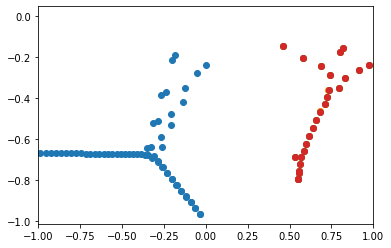

In [ ]:
S_k = ux@v/np.diag(s)
Lambda, W = np.linalg.eig(S_k)

#opet isto..

Z, L, r, _, _ = GEDMDQ(xfull[:,:100], xfull[:,1:101], k=26)
plt.scatter(np.real(os), np.imag(os)) #real orr-sommerfeld eigs
plt.scatter(np.real(L), np.imag(L))
plt.scatter(np.real(dmd1.eigs), np.imag(dmd1.eigs))
plt.scatter(np.real(Lambda), np.imag(Lambda))
plt.xlim(-1,1)
plt.show()